
# Bankruptcy Classification:

Classify bankrupt companies five years from now using financial ratios

### Outline:
1. Import packages
2. Read data
3. Data Pre-processing
> * Encoding
> * Remove Missing data
> * Outliers
4. Data Analysis
> * Descriptive Statistics
> * ANOVA/Feature Selection
> * Inspect correlations
5. SMOTE
6. Logistic Regression
7. Classification report
8. Quantifying the effect of each variable on the prediction
9. Findings


### Designation:
* attr1 - net profit / total assets
* attr2 - total liabilities / total assets
* attr3 - working capital / total assets
* attr4 - current assets / short-term liabilities
* attr5 - [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
* attr6 - retained earnings / total assets
* attr7 - EBIT / total assets
* attr8 - book value of equity / total liabilities
* attr9 - sales / total assets
* attr10 - equity / total assets
* attr11 - (gross profit + extraordinary items + financial expenses) / total assets
* attr12 - gross profit / short-term liabilities
* attr13 - (gross profit + depreciation) / sales
* attr14 - (gross profit + interest) / total assets
* attr15 - (total liabilities * 365) / (gross profit + depreciation)
* attr16 - (gross profit + depreciation) / total liabilities
* attr17 - total assets / total liabilities
* attr18 - gross profit / total assets
* attr19 - gross profit / sales
* attr20 - (inventory * 365) / sales
* attr21 - sales (n) / sales (n-1)
* attr22 - profit on operating activities / total assets
* attr23 - net profit / sales
* attr24 - gross profit (in 3 years) / total assets
* attr25 - (equity - share capital) / total assets
* attr26 - (net profit + depreciation) / total liabilities
* attr27 - profit on operating activities / financial expenses
* attr28 - working capital / fixed assets
* attr29 - logarithm of total assets
* attr30 - (total liabilities - cash) / sales
* attr31 - (gross profit + interest) / sales
* attr32 - (current liabilities * 365) / cost of products sold
* attr33 - operating expenses / short-term liabilities
* attr34 - operating expenses / total liabilities
* attr35 - profit on sales / total assets
* attr36 - total sales / total assets
* attr37 - (current assets - inventories) / long-term liabilities
* attr38 - constant capital / total assets
* attr39 - profit on sales / sales
* attr40 - (current assets - inventory - receivables) / short-term liabilities
* attr41 - total liabilities / ((profit on operating activities + depreciation) * (12/365))
* attr42 - profit on operating activities / sales
* attr43 - rotation receivables + inventory turnover in days
* attr44 - (receivables * 365) / sales
* attr45 - net profit / inventory
* attr46 - (current assets - inventory) / short-term liabilities
* attr47 - (inventory * 365) / cost of products sold
* attr48 - EBITDA (profit on operating activities - depreciation) / total assets
* attr49 - EBITDA (profit on operating activities - depreciation) / sales
* attr50 - current assets / total liabilities
* attr51 - short-term liabilities / total assets
* attr52 - (short-term liabilities * 365) / cost of products sold)
* attr53 - equity / fixed assets
* attr54 - constant capital / fixed assets
* attr55 - working capital
* attr56 - (sales - cost of products sold) / sales
* attr57 - (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)
* attr58 - total costs /total sales
* attr59 - long-term liabilities / equity
* attr60 - sales / inventory
* attr61 - sales / receivables
* attr62 - (short-term liabilities *365) / sales
* attr63 - sales / short-term liabilities
* attr64 - sales / fixed assets
* class - the response variable Y: 0 = did not bankrupt; 1 = bankrupt

# Import packages

In [1]:
from scipy.io import arff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10,9)

# Read Data

In [3]:
data = arff.loadarff('../input/forecasting-bankrupts-with-ann/1year.arff')
df = pd.DataFrame(data[0])
df

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.04720,32.3510,0.388250,0.249760,1.330500,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
1,0.209120,0.49988,0.47225,1.94470,14.7860,0.000000,0.258340,0.996010,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,b'0'
2,0.248660,0.69592,0.26713,1.55480,-1.1523,0.000000,0.309060,0.436950,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,b'0'
3,0.081483,0.30734,0.45879,2.49280,51.9520,0.149880,0.092704,1.866100,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,b'0'
4,0.187320,0.61323,0.22960,1.40630,-7.3128,0.187320,0.187320,0.630700,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0.018371,0.47410,-0.13619,0.60839,-18.4490,0.018371,0.018371,0.972030,1.01210,0.460840,...,0.011909,0.039866,0.98809,0.274140,73.5050,79.2370,31.268,11.6730,5.14890,b'1'
7023,-0.013359,0.58354,-0.02265,0.92896,-42.2320,-0.013359,-0.015036,0.562890,0.98904,0.328470,...,-0.011082,-0.040671,1.01110,0.805920,10.5990,7.1740,94.092,3.8792,1.75720,b'1'
7024,0.006338,0.50276,0.43923,1.87360,9.7417,0.006338,0.012022,0.983560,1.00830,0.494490,...,0.008258,0.012817,0.99174,0.000000,10.4700,6.0759,51.019,7.1542,62.00100,b'1'
7025,-0.041643,0.84810,-0.12852,0.57485,-121.9200,0.000000,-0.036795,0.179010,0.42138,0.151820,...,-0.232720,-0.274290,0.98788,3.593100,39.7030,3.1420,261.850,1.3939,0.51005,b'1'


# Pre-processing:

## Encoding:
Convert target to 0's and 1's instead of b'0' and b'1' respectively.

In [4]:
df['class'] = df['class'].astype(int)

## Remove missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   7024 non-null   float64
 1   Attr2   7024 non-null   float64
 2   Attr3   7024 non-null   float64
 3   Attr4   6997 non-null   float64
 4   Attr5   7019 non-null   float64
 5   Attr6   7024 non-null   float64
 6   Attr7   7024 non-null   float64
 7   Attr8   7002 non-null   float64
 8   Attr9   7026 non-null   float64
 9   Attr10  7024 non-null   float64
 10  Attr11  6988 non-null   float64
 11  Attr12  6997 non-null   float64
 12  Attr13  7027 non-null   float64
 13  Attr14  7024 non-null   float64
 14  Attr15  7025 non-null   float64
 15  Attr16  7002 non-null   float64
 16  Attr17  7002 non-null   float64
 17  Attr18  7024 non-null   float64
 18  Attr19  7027 non-null   float64
 19  Attr20  7027 non-null   float64
 20  Attr21  5405 non-null   float64
 21  Attr22  7024 non-null   float64
 22  

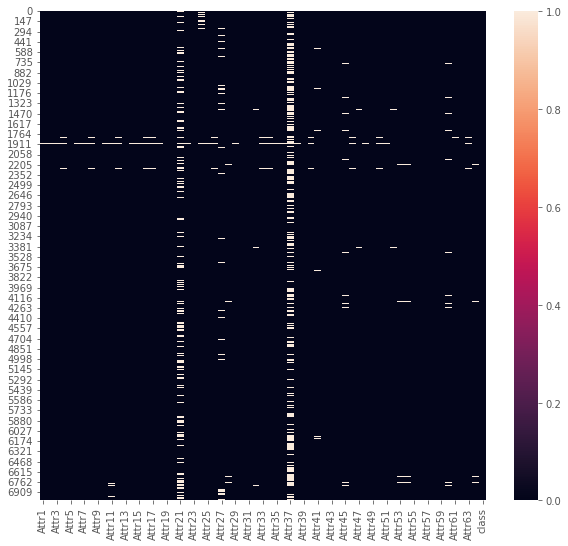

In [6]:
sns.heatmap(df.isna())
plt.show()

Drop Attr21 & Attr37 then remove Nan

In [7]:
df.drop(['Attr21','Attr37'], axis = 1, inplace = True)
df.dropna(inplace = True)
df.isna().sum()

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
         ..
Attr61    0
Attr62    0
Attr63    0
Attr64    0
class     0
Length: 63, dtype: int64

64 variables are of type floats with no missing values and a binary Target 


## Outliers
Filtering outliers removed more than half of the samples.

In [8]:
def identify_outliers(x,multiplier):
    """"Detect ouliers using IQR method with """

    q75 = np.percentile(x, 75)
    q25 = np.percentile(x, 25)
    iqr = q75 - q25
    threshold = iqr*multiplier
    upper = q75 + threshold 
    lower = q25 - threshold
    outliers = x[(x<lower) | (x> upper)]
    return outliers    

In [9]:
#for col in df.iloc[:,:-1]:
#    outliers = identify_outliers(df[col], 3)
#    df.drop(labels = outliers.index, axis = 0, inplace = True)

## Data Analysis

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


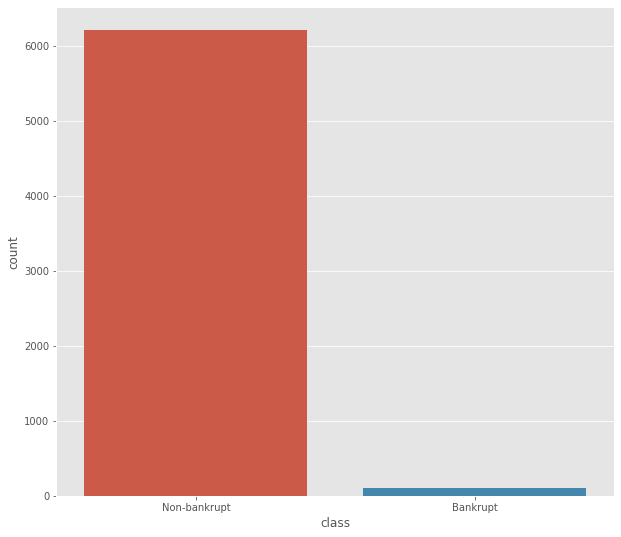

1.6619183285849954


In [10]:
sns.countplot(df['class'])
plt.xticks([0,1], ['Non-bankrupt', 'Bankrupt'])
plt.show()
print(len(df[df['class'] == 1])/len(df['class']) * 100)

The data is imbalanced where only 1.66% of the companies are bankrupt. This might suggest reconsidering the evaluations metrics such as precsions and recall when classifyng or oversampling

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


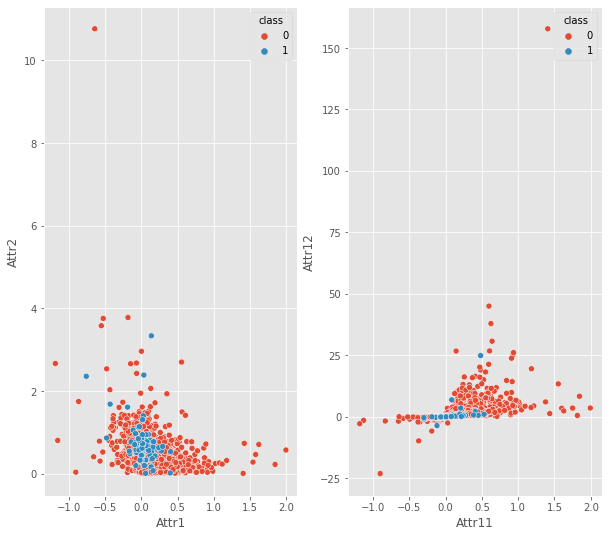

In [11]:
plt.subplot(1,2,1)
sns.scatterplot(df['Attr1'], df['Attr2'], hue = df['class'])

plt.subplot(1,2,2)
sns.scatterplot(df['Attr11'], df['Attr12'], hue = df['class'])
plt.show()

## Descriptive Statistics

In [12]:
stats = df.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Attr1,6318.0,0.104830,0.155845,-1.186200,0.022538,0.076168,0.157773,1.994300e+00
Attr2,6318.0,0.502763,0.310280,0.004765,0.298922,0.481230,0.677360,1.075900e+01
Attr3,6318.0,0.186207,0.304604,-10.036000,0.029755,0.181190,0.358245,9.518000e-01
Attr4,6318.0,2.415774,4.148543,0.060713,1.066275,1.503100,2.449350,1.638900e+02
Attr5,6318.0,259.724237,16900.579795,-102660.000000,-44.025500,-5.987600,36.462500,9.909000e+05
...,...,...,...,...,...,...,...,...
Attr61,6318.0,11.281208,35.267407,0.000408,4.884625,7.066550,10.647750,1.451500e+03
Attr62,6318.0,1269.437308,91545.750182,0.350220,43.977250,68.788000,105.957500,7.276000e+06
Attr63,6318.0,7.862085,18.222272,0.000050,3.444900,5.306150,8.299800,1.042200e+03
Attr64,6318.0,20.578546,161.522271,0.000066,2.502675,4.532850,9.383500,8.226600e+03


## ANOVA: feature selection
Check the importance and the significance of each variable on bankruptcy.
Since we have two groups 'non-bankrupt' and 'Bankrupt', one simple approach is to test the significance of all the attributes through a one-way ANOVA; check the weather the mean level is different between the two groups. This will have multiple positive implications.
1. Trim the dataset to be able analyze the important variables and visualize them.
2. helps in feature selection when classifying and picking a right model.

*                   $H_0: \mu_1$ = $\mu_2$
*                   $H_1: \mu_1$ $\neq \mu_2$ 
* where 1 is the first class 'Non-bankrupt' and 2 is 'Bankrupt'

In [13]:
def anova(X,y):
    #instantiate a class
    best = SelectKBest(f_classif)

    #fit
    best.fit(X,y)

    #print features whose p-value in less than 0.05
    X_significant = best.get_feature_names_out(X.columns)
    
    return X_significant

In [14]:
X_significant = anova(df.iloc[:,:-1], df.iloc[:,-1])
X_significant

array(['Attr1', 'Attr2', 'Attr10', 'Attr14', 'Attr18', 'Attr24', 'Attr25',
       'Attr29', 'Attr38', 'Attr51'], dtype=object)

10 attributes are significant. Attr 2 that measures the return on assets (ROA) is significant than Attr 3 that measures the short-term solvency of a company. These attributes only will affect our prediction values. 

In [15]:
# Split the features and target  
X = df.loc[:,X_significant]
y = df.iloc[:,-1]

<AxesSubplot:>

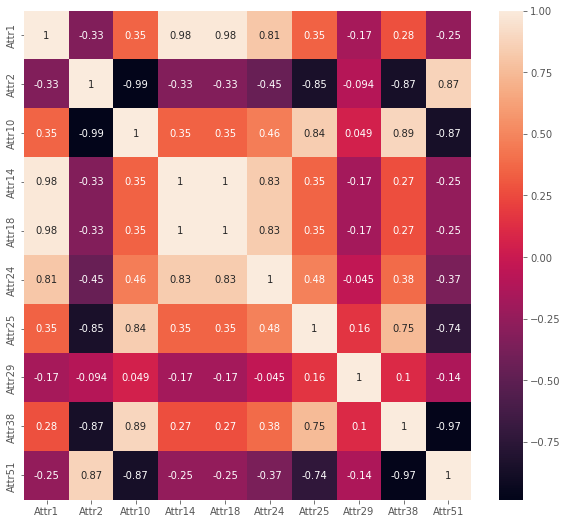

In [16]:
sns.heatmap(X.corr(), annot = True)

Attr 14 and Attr 18 are perfectly correlated. 
Drop them. Redundant information 

In [17]:
X.drop('Attr14', axis = 1, inplace = True)

In [18]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

## PCA 
Vizualizing the data with PCA will help in selecting a correct model, it will help identify weather the data is linearly seperable or not. the classes might exhibit heavy overlap, hence no matter which model we choose, it will perform poorly on the test set.  

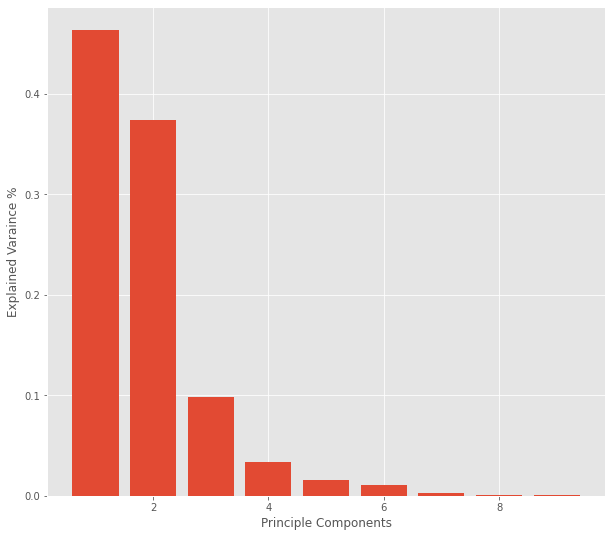

In [19]:
scaler = StandardScaler(with_std = False)
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA()
X_train_transformed = pca.fit_transform(X_train_scaled)

plt.bar(x = range(1,len(pca.components_[:,0])+1), height = pca.explained_variance_ratio_)
plt.xlabel('Principle Components')
plt.ylabel("Explained Varaince %")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


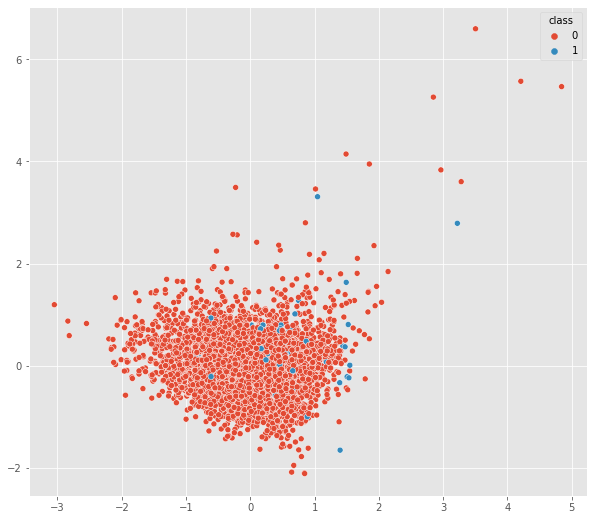

In [20]:
#Vizualizing only two components
sns.scatterplot(X_train_transformed[:,0], X_train_transformed[:,1], hue = y_train)
plt.show()

Even though, we selected the relevant features, the classes overlap heavily. This suggests that models will perform poorly 

# SMOTE
As stated the data is extremely imbalanced. Over-sampling is implemented to remedy this issue. 

In [21]:
# Fit resample
over_sample = SMOTE(sampling_strategy = 0.5,random_state = 1)
X_train, y_train = over_sample.fit_resample(X_train, y_train)
X_train

,Attr1,Attr2,Attr10,Attr18,Attr24,Attr25,Attr29,Attr38,Attr51
0,0.264430,0.519670,0.480330,0.328770,0.490780,0.439060,3.514700,0.882400,0.109160
1,0.008414,0.932810,0.054602,0.010588,0.021175,0.045050,4.641100,0.199130,0.708120
2,-0.093584,0.580220,0.419780,-0.100300,-0.111730,0.181030,3.828100,0.419780,0.485360
3,0.186510,0.317240,0.682760,0.240130,0.240130,0.430170,3.323200,0.925920,0.074080
4,0.646460,0.218940,0.781060,0.646460,1.194400,0.568570,3.434400,0.781060,0.218940
...,...,...,...,...,...,...,...,...,...
7451,0.130211,0.667649,0.332424,0.167347,0.167347,0.232030,3.413084,0.421931,0.538154
7452,-0.003161,0.395227,0.604771,0.150517,0.289107,0.517368,4.695703,0.794419,0.200373
7453,0.017524,0.277484,0.722508,0.025096,0.052789,0.498404,4.842631,0.727086,0.213660
7454,0.003221,0.687695,0.312099,0.015223,0.015223,0.098805,3.017721,0.321189,0.624800


# Logistic regression model

In [22]:
# make pipe line
pipe = make_pipeline(
    StandardScaler(with_std = False),
    LogisticRegression(penalty = 'l2', fit_intercept = True)
)
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_std=False)),
                ('logisticregression', LogisticRegression())])

## Classification report

In [23]:
def plot_roc_curve(model, y_probs, y_test):
    """plots the roc curvee"""
    null_model_probs = [0 for idx in range(len(y_test))]

    fpr, tpr, thresholds = roc_curve(y_test, y_probs[:,1])
    null_fpr, null_tpr, null_thresholds = roc_curve(y_test, null_model_probs)

    plt.plot(fpr,tpr, marker = '.', label = 'logistic')
    plt.plot(null_fpr, null_tpr, marker = '_', label = 'null_model')

    plt.xlabel('False positive rate')
    plt.ylabel('True possitive rate')
    plt.show()


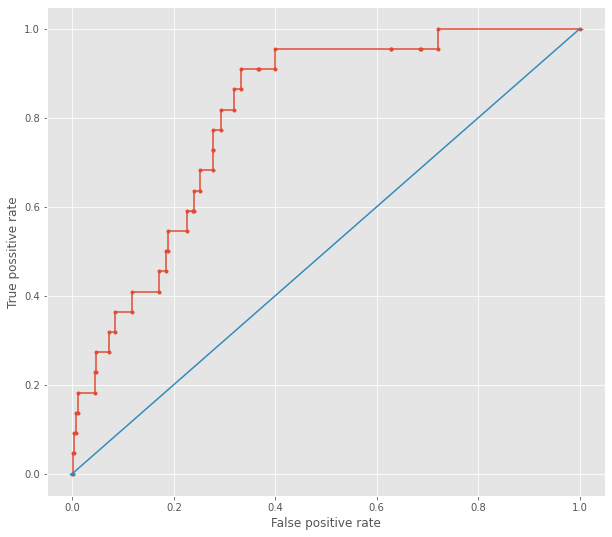

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      1242
           1       0.06      0.41      0.10        22

    accuracy                           0.87      1264
   macro avg       0.52      0.64      0.51      1264
weighted avg       0.97      0.87      0.91      1264

confusion Matrix: 
 [[1089  153]
 [  13    9]]
AUC:  0.6429512516469039


In [24]:
y_probs = pipe.predict_proba(X_test)
plot_roc_curve(pipe, y_probs, y_test)

y_pred = pipe.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("AUC: ",roc_auc_score(y_test, y_pred))

**41%** of the positive samples (bankrupt) were correctly classified, however with a high false positive rate of  $153/(153+1089)$ = **12%**. This would cost a lot of dollars for these false alarms. The classifier has **64%** chance of correctly disnguishing a Bankrupt from a Non-Bankrupt company.
The model could be tweaked by increasing the threshold to decrease the false positive rate. this depends on the business problem and the type of organisation using this model. Some might prioritise recall over precision. 

In [25]:
def tune_threshold(y_probs, threshold):
    
    """ Predicts target with varing the threshold"""
    y_pred_with_threshold = []

    for prob in y_probs[:,1]:
            if prob > threshold:
                y_pred_with_threshold.append(1)
            else:
                y_pred_with_threshold.append(0)
    return y_pred_with_threshold

In [26]:
y_pred_tuned = tune_threshold(y_probs, 0.6)
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))
print("confusion Matrix: \n", confusion_matrix(y_test, y_pred_tuned))
print("AUC: ",roc_auc_score(y_test, y_pred_tuned))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96      1242
           1       0.08      0.27      0.12        22

    accuracy                           0.93      1264
   macro avg       0.53      0.61      0.54      1264
weighted avg       0.97      0.93      0.95      1264

confusion Matrix: 
 [[1172   70]
 [  16    6]]
AUC:  0.6081832820963256


An organization might only accept\risk **5%** false positive rate; hence, raising the threshold to **0.6**, making them classify only 6 bankrupt companies.

### Quantifying the effect of each variable on the prediction

In [27]:
model = pipe.named_steps['logisticregression']
model.coef_

array([[-4.00085431,  6.53106313,  5.64164227,  3.2003667 , -1.97467406,
        -0.85434412, -0.94107676, -1.97686949, -1.46944156]])

In [28]:
feature_names = pipe.feature_names_in_
feature_names

array(['Attr1', 'Attr2', 'Attr10', 'Attr18', 'Attr24', 'Attr25', 'Attr29',
       'Attr38', 'Attr51'], dtype=object)

**Equation:**

$log(p/1-p)= -0.819
-4.016X_1 + 6.5271X_2 + 5.639X_3 + 3.214X_4 - 1.976X_5 - 0.855X_6
- 0.940X_7 - 1.976X_8 -1.467X_9$ 

In [29]:
def get_odds(feature_names, model):
    """ gets the odds ratio of the coeffients multiplied by a 100  """
    
    for var, coef in enumerate(model.coef_[0,]):
        odds = (np.exp(coef) * 100)
        odds = round(odds, 2)
        print(feature_names[var],":", odds)

In [30]:
get_odds(feature_names, model)

Attr1 : 1.83
Attr2 : 68612.73
Attr10 : 28192.53
Attr18 : 2454.15
Attr24 : 13.88
Attr25 : 42.56
Attr29 : 39.02
Attr38 : 13.85
Attr51 : 23.01


### Findings
These variables are the ones affecting our classification.
Logistic regression was used to analyze the effect of these 9 predictors with respect to bankruptcy. It was found that, Attr1 (return on assets) ***decreases*** the risk of bankruptcy by 98.6%. An in Attr2 ***increases*** the risk of bankruptcy by 24139%, this is doesn't violate theory, as it measures the solvency of a company, it also has the most significant on prediction. An increase Attr24 b a unit ***decreases*** the risk of bankruptcy by 56% on average.

In [31]:
pipe2 = make_pipeline(
    RandomForestClassifier()
)
pipe2.fit(X_train, y_train)

Pipeline(steps=[('randomforestclassifier', RandomForestClassifier())])

In [32]:
y_pred_lgbm = pipe2.predict(X_test)
print(classification_report(y_test, y_pred_lgbm))
print(confusion_matrix(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1242
           1       0.02      0.05      0.03        22

    accuracy                           0.95      1264
   macro avg       0.50      0.51      0.50      1264
weighted avg       0.97      0.95      0.96      1264

[[1198   44]
 [  21    1]]
